In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Regression Models
*Taking our first steps to modelling data.*

**Table of Contents**
* Problem overview
    * Regression, classification
    * Machine learning: putting it all together
* Linear regression
    * Motivation, derivation, usage
    * More involved example
* Logistic regression
    * Motivation, usage

## Problem Overview
*Types of modelling*

### Data Modelling
* As part of the data science process, we want to get a clear idea of what processes generate our data
    * **Scientific method**: Form a hypothesis and test it
    * Extension: Find a way to understand what’s in the data
        - We already did this a lot of times: "mental models" captured our ideas

* A stricter way of modelling
    * Treat the data generating process as a function
        - "Black box"
    * Make some assumptions
    * Create a simplified version of reality under your assumptions
    * Check your model against reality
        - ⇒Create better and more complex models

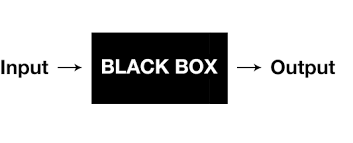

*Remainder,*

-Descriptive Statistics

-Inferential Statistics

-LLN ⇒ The law of large numbers states that an observed sample average from a large sample will be close to the true population average and that it will get closer the larger the sample.

-Feature Engineering - Feature engineering involves the extraction and transformation of variables from raw data, such as price lists, product descriptions, and sales volumes so that you can use features for training and prediction.

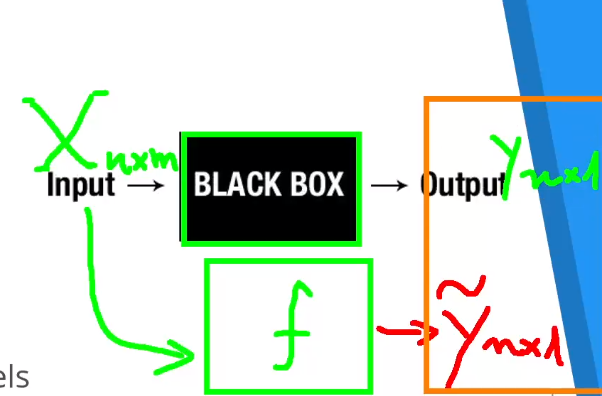

### A Quick Peek at Machine Learning
* Machine learning is "making computers learn with experience, without being explicitly programmed"
    * Similar to how humans learn
* It's all about models
    * ML follows the same processes as we’re going to do
    * ML algorithms are basically "function approximations"
        - Each algorithm does its own thing, i.e. has different assumptions, scope and performance
* It's also about selecting the best model
    * There are many "helper algorithms" to do so either fully automated or semi-automated.
        - Visualization algorithms,
        - Fine-tuning algorithms,
        - Model selection algorithms, etc.


* There are a lot of classes of problems
* The most used two
    * **Regression model** a function which returns a number (i.e., returns a continuous variable) → $y \in \mathbb R$
        - Example: predict the temperature tomorrow
    * **Classification model** a function which tries to differentiate between two (or more) predefined types of things → $y \in$ **{d, c}**
        - Example: predict if an image is of a cat or not
* The essence: once we assume a model, **we can make predictions** about function outputs
    * Thus, we can capture patterns in an otherwise unpredictable world
    

## Linear Regression
*Predict continuous values… and torture first semester students*
### Linear Regression Intuition
* Regression - **predicting a continuous variable**  →  $y \in \mathbb R$
* Problem statement
    - Given pairs of (𝑥;𝑦)points, create a model
        - **Under the assumption that 𝑦 depends linearly on 𝑥 (and nothing else)**
* Linear regression model
    * **𝑦=𝑎𝑥+𝑏**
        - 𝑎,𝑏 - unknown parameters
        - Example: 𝑦=2𝑥+3
    * Real case: we have many sources of error
        - So, the relationship we observe, cannot be perfect
        - There is some noise added to our data
            - **𝑦=𝑎𝑥+𝑏+𝜀**
                - 𝜀 -**noise**
        - We **don't want** to model the noise, only the "useful function"


### Generating Data Points
* Generating a few "ideal" data points is easy
    * x = np.linspace(3 , 5 , 10)
    * y = 2 * x + 3
    * plt.scatter(x, y)
    * plt.xlabel("x")
    * plt.ylabel("y")
    * plt.show()

* Adding noise draw from a random distribution
    * y_noise = np.random.normal(size = len(y))
    * y_with_noise = y + y_noise
    * plt.scatter(x, y_with_noise)
    * plt.xlabel("x")
    * plt.ylabel("y")
    * plt.show()


* If we want, we can even configure the "size" of our noise
    * More noise = worse data = less accurate prediction* 

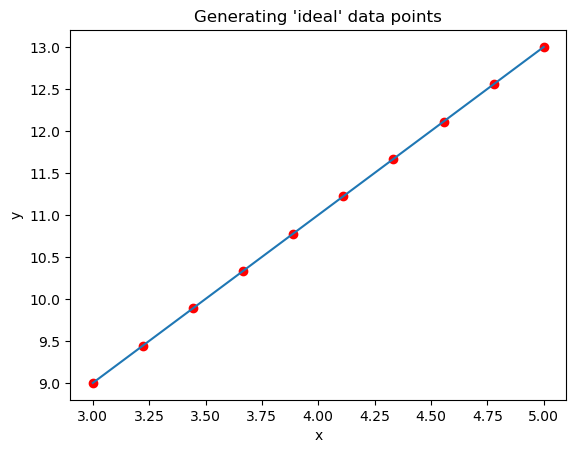

In [6]:
x = np.linspace(3 , 5 , 10)
y = 2 * x + 3
plt.scatter(x, y, c="r")
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generating 'ideal' data points")
plt.show()

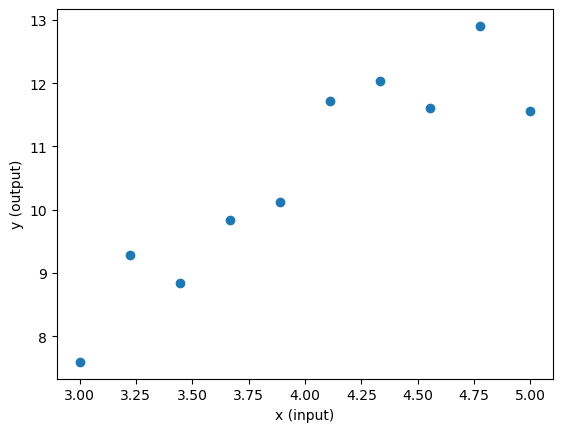

In [9]:
y_noise = np.random.normal(size = len(y))
y_with_noise = y + y_noise
plt.scatter(x, y_with_noise)
plt.xlabel("x (input)")
plt.ylabel("y (output)")
plt.show("Data points with 'noise'")
plt.show()

### First Attempt at Modelling
* We know the process was linear
    * Why don't we simply guess a few functions?
        - Remember: what we need to know are the parameters **𝑎** and **𝑏**
        - for y_guess in [3 * x + 8 , 4 * x + 3 , -2 * x]:
        - plt.scatter(x, y_with_noise)
        - plt.plot(x, y_guess)
        - plt.show()
        
* We can see that some functions perform much better than others
    * Idea: the best function lies "closest" to all points
    * Meaning
        - Try to measure the distances from all points to the line
        - See when these distances are smallest
            - This will be the best line

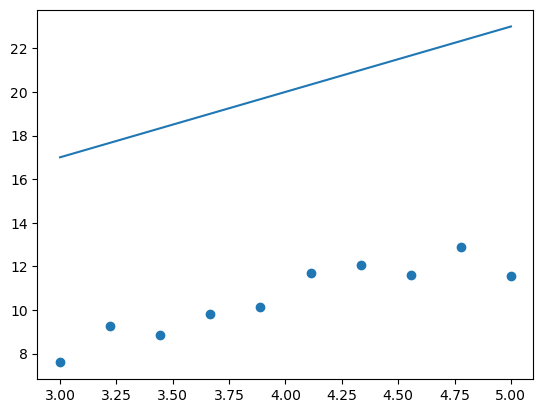

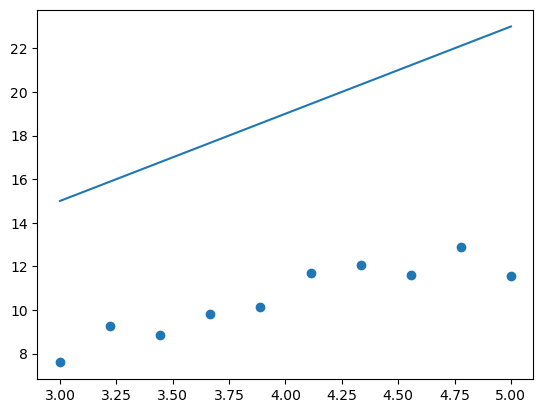

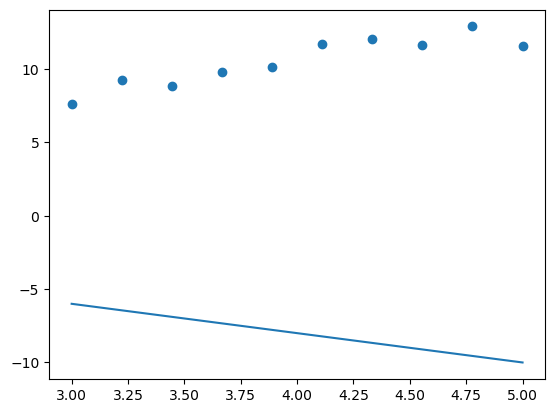

In [10]:
for y_guess in [3 * x + 8 , 4 * x + 3 , -2 * x]:
    plt.scatter(x, y_with_noise)
    plt.plot(x, y_guess)
    plt.show()

Click [here](https://softuni.bg/trainings/resources/video/86790/video-20-july-2023-%D0%B9%D0%BE%D1%80%D0%B4%D0%B0%D0%BD-%D0%B4%D0%B0%D1%80%D0%B0%D0%BA%D1%87%D0%B8%D0%B5%D0%B2-data-science-june-2023/4059) for interesting explanation of bias and modelling. 

### Distances
* By definition, the distance from a point **𝐴** to the line **𝑙** is measured on the perpendicular from 𝐴 to 𝑙
    * Red dashed lines
    * This is correct but very computationally expensive

* Another approach: consider vertical distances
    * Gray solid lines
    * Equivalent measures (for our purposes)
        - You can prove it to yourself

*Remainder,*

$\vec{a} . \vec{b} = 0$ are **orthogonal vectors**.

*“2 vectors are called orthogonal if they are perpendicular to each other, and after performing the dot product analysis, the product they yield is zero.”*

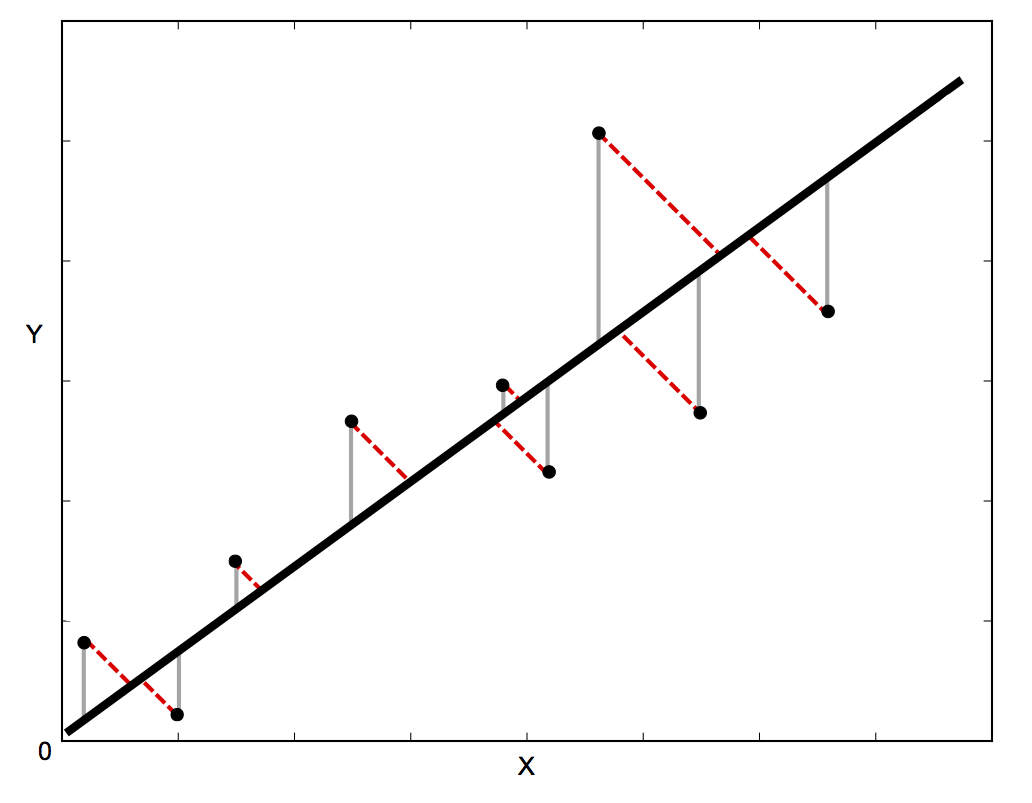

*Why we are using the gray lines and not the red ones? We have done it yet. You can calcualte the coordinates of a point if you know the basis vectors. We we use this grey vertical distance?*

Red dashed lines are correct but very computationally expensive. The projection $y'$ is easy to calculate. The distance become a very simple difference

|$d = y - y'$|

-------------------------------------------------------------------------------------------------------------------------------

* Look at a point and its projection
    * 𝑥-coordinate: the same
    * 𝑦-coordinate
        - Point: we know it from the start
        - Projection: we can calculate it
* Calculating the projection $y'$
    * It’s whatever the model function produces for 𝑥
    * → **$y'$ = ax + b**
    
* Distance becomes a very simple difference
   * $d = y - y'$
       - But… now distances can be negative


* To make distances positive, we can do a lot of things
    * Simplest: take the absolute value
        - This is used sometimes
            - **Mean absolute error, MAE**
        - Although it works quite well, there are a few problems with it
        - E.g.𝑑=0 at the "perfect" line

    * Better: square the distance   $\sqrt{d^2}$  ↦ $\sqrt{(y - y')^2}$
        - It's also non-negative everywhere but…
            - Is almost always > 0
            - Emphasizes bigger errors more (can be good or bad)
    * This is called **mean square error (MSE)**


So the logic is, as square is a monotonic function. So if you have monotonic function, you aren´t changing the coordinates of the minumums, you´re changing the numbers, but not the coordinates of the minimums. So if the existing of  the square root is not changing the minumums, the ausence won´t change them too.

* New definition of distance 
    * $ d = (y - y')^2 $
    
* You can also find it like $||(y - y')||$
    * *Eucledean Distance* or $||(y - y')||_2$
    * Eucledean norm or [Norm](https://en.wikipedia.org/wiki/Norm_(mathematics))

### Cost Function

#### 𝐽 =  $\frac{1}{n} \sum_{i=1}^{n} (y - y')^2 $ ####

* We want to somehow account for all points
    * We can simply sum all distances to get a measure of "the total distance" from all points to the line
    * Since we can have 4, 10, 100 or $10^9$ points, we also need to **normalize the error**
    
    
* The sum of distances now becomes
    * **𝐽 =  $\frac{1}{n} \sum_{i=1}^{n} (y - y')^2 $**
    * This is what we call our **total cost function**
        - Beware of **confusing terms**: **𝑑** is usually called a "loss function", while **𝐽** is the "(total) cost function"
    * This is an estimation of the total distance
    * Minimizing this function will produce the best line
    
    
### Calculating the Cost Function
* The code is pretty simple
* Given points 𝑥,𝑦 and a line with parameters 𝑎,𝑏 we can simply substitute in the formula above
    - First, for each 𝑥, compute $y'= ax + b$
    - After that, compute the distances $(y - y')^2$
    - Return the sum of all distances, divided by the number of points
        - def calculate_loss(x, y, a, b):
            - y_predicted = a * x + b
            - distances = (y - y_predicted) ** 2
            - return np.sum(distances) / len(x)
    - Now that we have a quantifier, we can go back to our three guessed lines and calculate their loss functions
        - It will give us the intuition of what we’re dealing with

In [11]:
def calculate_loss(x, y, a, b):
    y_predicted = a * x + b
    distances = (y - y_predicted) ** 2
    return np.sum(distances) / len(x)

### Inspecting the Cost Function
* Note that **𝐽** does not depend on 𝑥 and 𝑦
    * 𝑥 and 𝑦 are already fixed we don’t touch the data at all when we try to model it
    *  ⇒ **𝐽 depends only on the line parameters 𝑎,𝑏.** 
        - In math jargon, 𝐽 is a function of 𝑎 and 𝑏: 𝐽=𝑓(𝑎, 𝑏)


* Also note the form of 𝐽: it's $(⋯)^2$
    * This is a paraboloid (3D parabola)
    * See how varying 𝑎 and 𝑏 gives us a different output number for 𝐽
    * It has exactly one min value
        * And we can see it
    * Our task: find the parameters 𝑎, 𝑏 which make 𝐽 as small as possible
    
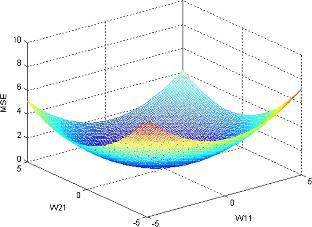

*Remember that you can think of it as a semi-stuffed blanket.*

### Minimizing the Cost Function
* Intuition
    * If the plot was a real object (say, a sheet of some sort), we could slide a ball bearing on it
    * After a while, the ball bearing will settle at the "bottom" due to gravity
    * We could measure the position of the ball and that's it :)

* More "nerd speak"
    * This is the same task - we have a gravity potential energy that the ball tries to minimize
        - When it's minimal, the ball remains in stable equilibrium


* Turns out, we can also do this using calculus
    * In many dimensions
    
* We can find the optimal parameters right away
    * Because the function is really simple
    * But we'll stick to another approach because this is what is useful for all other ML tasks

* We'll try to replicate the example with the ball 
    * Basically, we'll try to slide (descend) over the function surface until we reach the minimum
        * This method is called **gradient descent**

### Gradient Descent
*Imagine that you are lost in the mountains and it is night and there is no light. The only thing you can do to improve your situation is to go down. (the biggest step down) It will not always be the best path, but it will help you and it is the only thing that will improve the current situation you have. We call this gradient descent. In some moment you won´t be able to go lower*
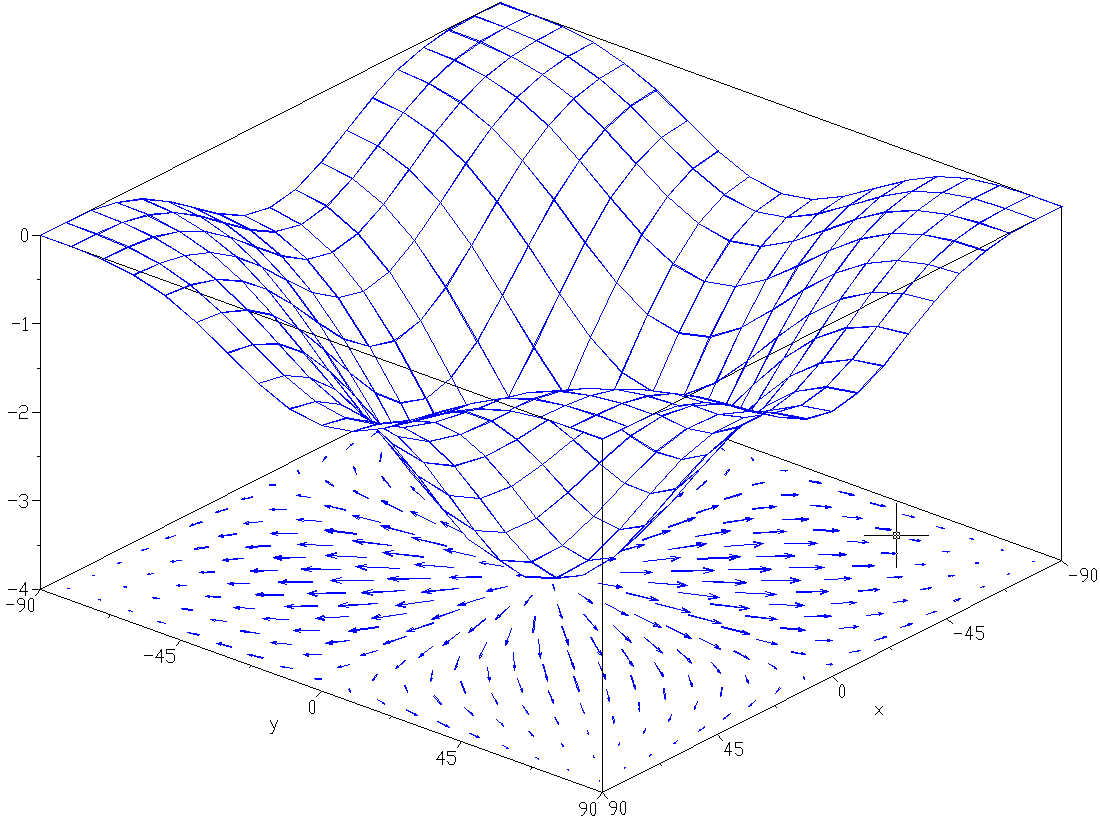

### Gradient Descent
* We know what **descent** is
    * How about **gradient** ?


* The gradient (let's call it **𝑔** for now) is a vector function
    * Like 𝐽, 𝑔 accepts two values 𝑎 and 𝑏
    * 𝑔 returns a vector which shows where the **steepest ascent** is
    * 𝑔 is all arrows on the picture


* Interpretation
    * The length of the vector tells us how steep the maximum is
        - Long vector = very, very steep;
        - short vector = relatively flat
    * The direction of the vector tells us where to go in order to get there


* Gradients will almost work
    * Except they show us the highest point, and we're looking for the lowest one
    * Solution: just take the negative gradient−𝑔
    * Ascending on −𝑔 is the same as descending on 𝑔


* This is good now, but how is the gradient defined?
    * We saw from the picture that it’s related to a function
    * The gradient of a function 𝐽(𝑎,𝑏) is a vector 𝑔(𝑎,𝑏) with the following components
    * $𝑔_a = \frac{\partial 𝐽}{a},𝑔_b = \frac{\partial 𝐽}{b}$
    * The 𝜕 symbol means "partial derivative"
        - If you don't understand this, you only need to know that partial derivatives are quite easy to calculate



* Remember that **𝐽 =  $\frac{1}{n} \sum_{i=1}^{n} (y - y')^2 $**
    * we can prove that
    * **$\frac{\partial 𝐽}{a} = -\frac{2}{n} \sum_{}^{} x_i (y - y');  \frac{\partial 𝐽}{b} = -\frac{2}{n} \sum_{}^{}(y - y')$**
    
* This can be implemented easily
    * a_gradient = 2 / len(x) * np.sum(x * (y -(a * x + b))
    * b_gradient = 2 / len(y) * np.sum(y - (a * x + b))
        * Note how this code makes use of numpy and its extremely easy operations on arrays
        
* Now, if we know 𝑥,𝑦,𝑎,𝑏 we can calculate the gradient vector
    * You'll also see the gradient of 𝐽 being denoted as 𝛻𝐽
        - This is simply math notation
        

* Let's now get to the real descent

* Iterative algorithm - perform as long as needed
    * Start from some point in the (𝑎;𝑏) space: $(𝑎_0;𝑏_0)$
    * Decide how big steps to take: number **𝛼**
        - Called "learning rate" in ML terminology
    * Use the current 𝑎,𝑏 and 𝑥,𝑦 to compute 𝛻𝐽
        * $−𝛻𝐽_𝑎$ tells us how much to move in the 𝑎direction in order to get to the minimum
        * Similar for $-𝛻𝐽_𝑏$
    * Take a step with size 𝛼 in each direction
        * $𝑎_1= 𝑎_0−𝛻𝐽_𝑎$; $𝑏_1 = 𝑏_0 − 𝛻𝐽_𝑏$
        * $a_1; 𝑏_1$ are the new coordinates
    * Repeat the two preceding steps as needed 
        * Usually, we do this for a fixed number of iterations

In [22]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = 2 / len(x) * np.sum(x * (y -(a * x + b)))
    b_gradient = 2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    
    return (new_a, new_b)

In [26]:
model_a, model_b = 10, 20  #Start points; can be anywhere
alpha = 0.01  #Learning rate, used to be fixed

#entire process 1000 iterations
for step in range(1001):  
    model_a, model_b = perform_gradient_descent(data_x, data_y, model_a, model_b, alpha)
    if step % 100 == 0:
        error = calculate_loss(data_x, data_y, model_a, model_b)
        print(("Step {}: a = {}, b = {}, J = {}".format(step, model_a, model_b, error))

print("Final line: {} * x + {}".format(model_a, model_b))

SyntaxError: invalid syntax (2027911429.py, line 11)

### Gradient Descent Code
* Gradient descent step
    * def perform_gradient_descent(x, y, a, b, learning_rate):
        * a_gradient = 2 / len(x) * np.sum(x * (y -(a * x + b))
        * b_gradient = 2 / len(y) * np.sum(y - (a * x + b))
        * new_a = a - a_gradient * learning_rate
        * new_b = b - b_gradient * learning_rate
             * return (new_a, new_b)

* Entire process: 1000 iterations
    * model_a, model_b = 10, 20 # Start points; can be anywhere
    * alpha = 0.01 # Learning rate
    * for step in range(1001):
        * model_a, model_b = perform_gradient_descent(data_x, data_y, model_a, model_b, alpha):
        * if step % 100 == 0:
            - error = calculate_loss(data_x, data_y, model_a, model_b)
            - print(("Step {}: a = {}, b = {}, J = {}".format(step, model_a, model_b, error))
        * print(("Final line: {} * x + {}".format({}".format(model_a, model_b))

### Results and Interpretation
* Going through the entire process, we now have a line 𝑦=𝑎𝑥+𝑏 which describes our data in the best way
    * We could plot the evolution of 𝐽 to see that it always decreases
        * If it doesn’t, this indicates a problem with our algorithm

* This was a lot of work
    * Thankfully, there are libraries that hide away all that complexity for us
    * **scikit-learn** is the most popular of them
        - Arguably, the most popular of the scikit s as well
    * Also, generalizes trivially to more dimensions

* from sklearn.linear_model import LinearRegression
    * model = LinearRegression()
    * model.fit(data_x.reshape(-1 , 1 ), data_y)
    * print (model.coef_, model.intercept_)

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data_x.reshape(-1 , 1 ), data_y)
print (model.coef_, model.intercept_)

NameError: name 'data_x' is not defined

## Logistic Regression
*Use a regression model to classify*
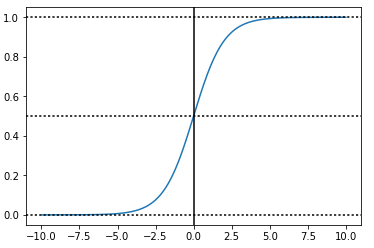
### Logistic Regression
* The name is a bit misleading
    * This is used for classification


* Two classes, 0 and 1
    * Can generalize to more classes using a "trick"
 
 
* A function to discriminate: **sigmoid**
    * 𝑥 < 0  ⇒  𝑦=0;    𝑥 > 0 ⇒ 𝑦=1
    * We'll look at the implementation later 


* Loss function
    * Similar to the linear regression cost function


* Gradient descent


* Usage in scikit-learn
    * from sklearn.linear_model import LogisticRegression
    

### Overview of the Process
* We dealt mainly with the modelling part
    * It's only a piece of the puzzle
* Many algorithms to choose from
    * Each with its own features and drawbacks
* Many ways to test that we're on a correct path
* The end result depends mainly on
    * The person working on the dataset
    * The data quality
    * Less prominent but also worth mentioning
        * Data size (bigger is usually better)
        * Data acquisition and sampling processes
        
        
### *Summary*
* *Problem overview*
    * *Regression, classification*
    * *Machine learning: putting it all together*
* *Linear regression*
    * *Motivation, derivation, usage*
    * *More involved example*
* *Logistic regression*
    * *Motivation, usage*